<a href="https://www.kaggle.com/code/mh0386/digit-recognizer?scriptVersionId=146137528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
try:
    train = pd.read_csv('Data/train.csv')
    test = pd.read_csv('Data/test.csv')
except:
    train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
    test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = np.array(test)

In [6]:
y = train['label']
X = train.drop('label', axis=1)

In [7]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
test.dtype

dtype('int64')

In [10]:
X = X/255
test = test/255

In [11]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X = np.array(X)

In [13]:
X = X.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [14]:
X.shape

(42000, 28, 28, 1)

In [15]:
test.dtype

dtype('float64')

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = tf.keras.Sequential(
    [
        Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation=tf.nn.relu),
        Dense(256, activation=tf.nn.relu),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
    ]
)

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
h = model.fit(
    X, 
    y, 
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
1050/1050 [==============================] - 30s 26ms/step - loss: 0.3549 - accuracy: 0.8858 - val_loss: 0.1460 - val_accuracy: 0.9564
Epoch 2/50
1050/1050 [==============================] - 29s 28ms/step - loss: 0.1318 - accuracy: 0.9588 - val_loss: 0.1161 - val_accuracy: 0.9637
Epoch 3/50
1050/1050 [==============================] - 27s 26ms/step - loss: 0.1007 - accuracy: 0.9689 - val_loss: 0.0983 - val_accuracy: 0.9701
Epoch 4/50
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.0964 - val_accuracy: 0.9725
Epoch 5/50
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0737 - accuracy: 0.9775 - val_loss: 0.0819 - val_accuracy: 0.9767
Epoch 6/50
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 0.0736 - val_accuracy: 0.9799
Epoch 7/50
1050/1050 [==============================] - 27s 25ms/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0744 -

In [19]:
y_pred = model.predict(test)
y_pred

875/875 [==============================] - 6s 7ms/step


array([[3.3395825e-28, 0.0000000e+00, 9.9999994e-01, ..., 8.9999240e-22,
        1.8412010e-34, 0.0000000e+00],
       [9.9999994e-01, 6.1831676e-30, 8.8742076e-19, ..., 1.5483647e-21,
        9.4568433e-22, 4.1426416e-14],
       [1.8934950e-29, 1.3823607e-35, 1.1837635e-27, ..., 4.2060647e-22,
        1.9928808e-18, 9.9999994e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.9262633e-25, 2.3848967e-30, 9.5019984e-24, ..., 5.3271228e-19,
        1.8110905e-15, 9.9999994e-01],
       [1.8661309e-22, 6.6970124e-36, 9.9999994e-01, ..., 4.1071215e-17,
        5.5763048e-27, 0.0000000e+00]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis=1)
y_pred = y_pred.astype('float64')
y_pred

array([2., 0., 9., ..., 3., 9., 2.])

In [21]:
model.evaluate(test, y_pred)

875/875 [==============================] - 6s 7ms/step - loss: 0.0103 - accuracy: 1.0000


[0.01026718970388174, 1.0]

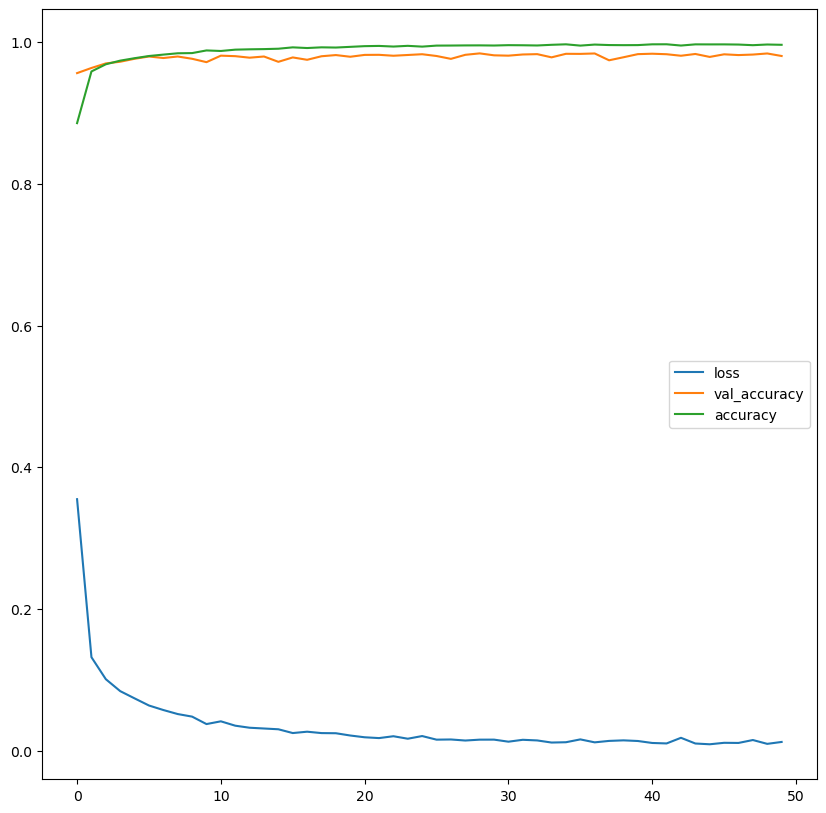

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(h.history['loss'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['accuracy'])
plt.legend(['loss', 'val_accuracy', 'accuracy'])
plt.show()

In [23]:
submission = pd.DataFrame(
    {
        'ImageId': range(1, len(y_pred) + 1),
        'Label': y_pred
    }
)
submission.to_csv('submission.csv', index=False)

In [24]:
model.save('Model/model.h5')